In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn import metrics
import graphviz

## Problem1

In [2]:
datap1=datasets.load_iris()

In [3]:
type(datap1)

sklearn.utils.Bunch

In [4]:
datap1.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
pdDatap1=pd.DataFrame(np.c_[datap1.data,datap1.target],columns=datap1.feature_names+['class'])

In [6]:
pdDatap1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
pdDatap1.isna().values.any()

False

In [8]:
pdDatap1.iloc[:,-1].value_counts()

2.0    50
1.0    50
0.0    50
Name: class, dtype: int64

In [9]:
xTrainp1,xTestp1,yTrainp1,yTestp1=train_test_split(pdDatap1.iloc[:,:-1],pdDatap1.iloc[:,-1],test_size=0.3)
for i in range(1,6):
    print("For Depth {0} below are the values \n".format(i))
    dtp1=DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=2,max_depth=i)
    dtp1.fit(xTrainp1, yTrainp1)
    predictp1=dtp1.predict(xTestp1)
    print(confusion_matrix(yTestp1,predictp1))
    print(classification_report(y_true=yTestp1,y_pred=predictp1,target_names=datap1.target_names))
    print('############################################################# \n')
#     print('Micro precision is {0}'.format(precision_score(y_true=yTest,y_pred=predict,average='micro')))
#     print('Macro precision is {0}'.format(precision_score(y_true=yTest,y_pred=predict,average='macro')))
#     print('Weighted precision is {0}'.format(precision_score(y_true=yTest,y_pred=predict,average='weighted')))
#     print('############################################################# \n')
#     print('Micro Recall is {0}'.format(recall_score(y_true=yTest,y_pred=predict,average='micro')))
#     print('Macro Recall is {0}'.format(recall_score(y_true=yTest,y_pred=predict,average='macro')))
#     print('Weighted Recal is {0}'.format(recall_score(y_true=yTest,y_pred=predict,average='weighted')))
#     print('############################################################# \n')
#     print('Micro f1Score is {0}'.format(f1_score(y_true=yTest,y_pred=predict,average='micro')))
#     print('Macro f1Score is {0}'.format(f1_score(y_true=yTest,y_pred=predict,average='macro')))
#     print('Weighted f1Score is {0}'.format(f1_score(y_true=yTest,y_pred=predict,average='weighted')))

For Depth 1 below are the values 

[[15  0  0]
 [ 0 13  0]
 [ 0 17  0]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.43      1.00      0.60        13
   virginica       0.00      0.00      0.00        17

    accuracy                           0.62        45
   macro avg       0.48      0.67      0.53        45
weighted avg       0.46      0.62      0.51        45

############################################################# 

For Depth 2 below are the values 

[[15  0  0]
 [ 0 12  1]
 [ 0  3 14]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.80      0.92      0.86        13
   virginica       0.93      0.82      0.87        17

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.92      0.91      0.91        45

##############################

C:\Users\venka\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The recall and precision vallues increase  as the height of the tree increases as there is more IG at each level so the maximum Precision and recall are observed at height 2 to 5.<br>
The ***f1-score*** increases if the bot the perecision and recall are high this can be obsereved from the height 2-5.<br>
***Micro*** calculates the metrics taking the True Positive,True Negative,False Positive ,False negative into consideration.<br>
***Macro*** calclates the metrics without taking the class imbalance into consideration.<br>
***Weighted*** calcluates the metrics taking into consieration of weighted imbalances.<br>

## Problem2

In [2]:
breastCancerDatap2=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",header=None,
                             names=['Samplenumber','ClumpThickness','UniformityCellSize','UniformCellShape','MarginAdhesion','SingleCellSize','BareNuclei','BlandChromatin','NormalNucl','Mitoses','Class'],na_values=['?'])

In [3]:
breastCancerDatap2.isna().values.any()

True

In [4]:
breastCancerDatap2.isnull().values.any()

True

In [5]:
print(breastCancerDatap2.dtypes)

Samplenumber            int64
ClumpThickness          int64
UniformityCellSize      int64
UniformCellShape        int64
MarginAdhesion          int64
SingleCellSize          int64
BareNuclei            float64
BlandChromatin          int64
NormalNucl              int64
Mitoses                 int64
Class                   int64
dtype: object


In [6]:
breastCancerDatap2['BareNuclei'].value_counts()

1.0     402
10.0    132
5.0      30
2.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: BareNuclei, dtype: int64

In [7]:
breastCancerDatap2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Samplenumber          699 non-null int64
ClumpThickness        699 non-null int64
UniformityCellSize    699 non-null int64
UniformCellShape      699 non-null int64
MarginAdhesion        699 non-null int64
SingleCellSize        699 non-null int64
BareNuclei            683 non-null float64
BlandChromatin        699 non-null int64
NormalNucl            699 non-null int64
Mitoses               699 non-null int64
Class                 699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [8]:
imputep2=SimpleImputer(strategy='mean')
breastCancerDatap2['BareNuclei']=imputep2.fit_transform(breastCancerDatap2[['BareNuclei']])

In [9]:
xTrainPr2,xTestpr2,yTrainpr2,yTestpr2=train_test_split(breastCancerDatap2.iloc[:,:-1],breastCancerDatap2.iloc[:,-1],test_size=0.3,)

In [10]:
print(xTrainPr2.shape)
print(xTestpr2.shape)
print(yTrainpr2.shape)
print(yTestpr2.shape)

(489, 10)
(210, 10)
(489,)
(210,)


In [11]:
dtPr2=DecisionTreeClassifier(min_samples_leaf=2,min_samples_split=5,max_depth=1)
dtPr2.fit(xTrainPr2,yTrainpr2)
predictPr2=dtPr2.predict(xTestpr2)
print(classification_report(y_true=yTestpr2,y_pred=predictPr2))
print(confusion_matrix(y_true=yTestpr2,y_pred=predictPr2))

              precision    recall  f1-score   support

           2       0.98      0.90      0.93       136
           4       0.84      0.96      0.89        74

    accuracy                           0.92       210
   macro avg       0.91      0.93      0.91       210
weighted avg       0.93      0.92      0.92       210

[[122  14]
 [  3  71]]


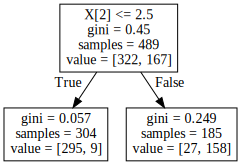

In [12]:
graphviz.Source(tree.export_graphviz(dtPr2))

In [13]:
dtPr2v2=DecisionTreeClassifier(min_samples_leaf=2,min_samples_split=5,max_depth=2)
dtPr2v2.fit(xTrainPr2,yTrainpr2)
predictPr2v2=dtPr2v2.predict(xTestpr2)
print(classification_report(y_true=yTestpr2,y_pred=predictPr2v2))
print(confusion_matrix(y_true=yTestpr2,y_pred=predictPr2v2))

              precision    recall  f1-score   support

           2       0.97      0.94      0.96       136
           4       0.90      0.95      0.92        74

    accuracy                           0.94       210
   macro avg       0.93      0.94      0.94       210
weighted avg       0.94      0.94      0.94       210

[[128   8]
 [  4  70]]


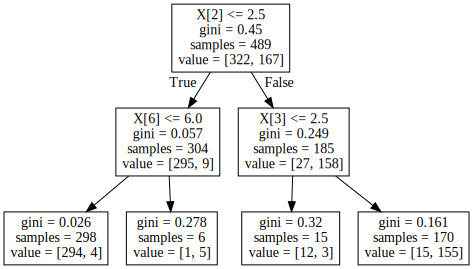

In [14]:
graphviz.Source(tree.export_graphviz(dtPr2v2))

## Problem 3

In [2]:
dataPr3=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',names=['id', 'diagnosis','radiusMean','textureMean','perimeterMean','areaMean','smoothnessMean','compactnessMean', 'concavityMean','oncavePointsMean', 'symmetryMean', 'fractalDimensionMean','radiusSe', 'textureSe', 'perimeterSe', 'areaSe', 'smoothnessSe','compactnessSe', 'concavitySe', 'concave pointsSe', 'symmetrySe','fractalDimensionSe', 'radiusWorst', 'textureWorst','perimeterWorst', 'areaWorst', 'smoothnessWorst','compactnessWorst', 'concavityWorst', 'concavePointsWorst','symmetryWorst', 'fractalDimensionWorst'])

In [3]:
dataPr3.head()

,id,diagnosis,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,oncavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
dataPr3.iloc[:,-1].shape

(569,)

In [5]:
dataPr3[["diagnosis"]].shape

(569, 1)

In [6]:
pca=PCA(n_components=1)

In [7]:
prinicpalComponents=pca.fit_transform(dataPr3.iloc[:,2:])
print(pca.explained_variance_ratio_)
print(prinicpalComponents.shape)
print(prinicpalComponents[:,0].shape)


[0.98204467]
(569, 1)
(569,)


In [8]:
xTrainPr3,xTestPr3,yTrainPr3,yTestPr3=train_test_split(prinicpalComponents,dataPr3[["diagnosis"]],test_size=0.3)

In [9]:
dtPr3=DecisionTreeClassifier(max_depth=1, min_samples_split=5, min_samples_leaf=2)
dtPr3.fit(xTrainPr3,yTrainPr3)
predict=dtPr3.predict(xTestPr3)
print(classification_report(y_pred=predict,y_true=yTestPr3))

              precision    recall  f1-score   support

           B       0.90      0.97      0.94       114
           M       0.94      0.79      0.86        57

    accuracy                           0.91       171
   macro avg       0.92      0.88      0.90       171
weighted avg       0.91      0.91      0.91       171



In [10]:
print(confusion_matrix(y_pred=predict,y_true=yTestPr3))

[[111   3]
 [ 12  45]]


In [11]:
pca2=PCA(n_components=1)
prinicpalComponentsv2=pca.fit_transform(dataPr3.iloc[:,2:])

In [12]:
xTrainPr3v2,xTestPr3v2,yTrainPr3v2,yTestPr3v2=train_test_split(prinicpalComponentsv2,dataPr3[["diagnosis"]],test_size=0.3)

In [13]:
dtPr3v2=DecisionTreeClassifier(max_depth=1, min_samples_split=5, min_samples_leaf=2)
dtPr3v2.fit(xTrainPr3v2,yTrainPr3v2)
predictv2=dtPr3v2.predict(xTestPr3v2)
print(classification_report(y_pred=predict,y_true=yTestPr3v2))

              precision    recall  f1-score   support

           B       0.64      0.71      0.67       112
           M       0.31      0.25      0.28        59

    accuracy                           0.55       171
   macro avg       0.48      0.48      0.48       171
weighted avg       0.53      0.55      0.54       171



In [14]:
print(confusion_matrix(y_pred=predictv2,y_true=yTestPr3v2))

[[109   3]
 [ 12  47]]


## Problem4

In [2]:
feature1p4=np.random.normal(5,2,500)
feature2p4=np.random.normal(-5,2,500)
print(feature1p4.shape)
print(feature2p4.shape)
class1p4=np.repeat(0,500)
class2p4=np.repeat(1,500)
data1p4=pd.DataFrame({'feature':feature1p4,'classLabel':class1p4})
data2p4=pd.DataFrame({'feature':feature2p4,'classLabel':class2p4})

(500,)
(500,)


In [3]:
data1p4.head()

,feature,classLabel
0,6.000080,0
1,0.550831,0
2,3.645289,0
3,6.771784,0
4,5.445052,0


In [4]:
data2p4.head()

,feature,classLabel
0,-8.339510,1
1,-4.475830,1
2,-1.711105,1
3,-5.510317,1
4,-5.583594,1


In [5]:
finalDatap4=pd.concat([data1p4,data2p4])
finalDatap4.head()

    feature  classLabel
0  6.000080           0
1  0.550831           0
2  3.645289           0
3  6.771784           0
4  5.445052           0
(1000, 2)


In [6]:
xTrainP4,xTestP4,yTrainP4,yTestP4=train_test_split(finalDatap4[['feature']],finalDatap4['classLabel'],test_size=0.3)

In [7]:
dtp4 = DecisionTreeClassifier(max_depth=2)
dtp4.fit(xTrainP4, yTrainP4)
predictp4=dtp4.predict(xTestP4)

In [14]:
fprp4,tprp4,thresholdsp4=metrics.roc_curve(y_score=predictp4,y_true=yTestP4)

In [15]:
print("THRESHOLD is {0}".format(thresholdsp4))

THRESHOLD is [2 1 0]


# Recitation

## Chapter 2

**Exercise 2)<br>
1)** Count of C0 is 10<br> 
   count of C1 is 10<br>
   Gini=1-(10/20)^2 -(10/20)^2 <br>
       =0.5<br>

**Exercise 2)<br>
2)** As ID are unique probability of each id is 1/20 <br>
   As there are only two possibilities of classes for the each ID Gini index of each id is 0 <br>
   so total GInin Index=20*(1/20)*0=0<br>

**Exercise 2)<br>
3)**<br>
Female count=10<br>
Male count=10<br>
Gini=1-(10/20)^2 -(10/20)^2<br>
=0.5<br>

**Exercise 2)<br>
4)**<br>
Family car Type Probability= 4/20=0.2 <br>
Sports car Type Probability= 8/20=0.4 <br>
Luxury car Type Probability= 8/20=0.4 <br>

P(Family|C1) =0.75 P(Family|C0) =0.25<br><br>
gini=1-(0.75)^2-(0.25)^2<br>
    =1-0.5625-0.0625<br>
    =0.375<br><br>
P(Sports|C1) =0     P(Sports|C0) =1<br>
gini=1-(0)^2-(1)^2<br>
    =0 <br><br>
P(Luxury|C1) =0.125 P(Luxury|C0) =0.875<br><br>
gini=1-(0.125)^2-(0.875)^2<br>
    =1-0.015625-0.765625<br>
    =0.21875<br><br>
Gini Index= (0.2*0.375)+(0.4*0)+(0.4*0.21875)
          =0.1625

**Exercise 2)<br>
5)**<br>
Small Shirt size:  5/20=0.25<br>
Medium Shirt size: 7/20=0.35<br>
Large Shirt size:  4/20=0.2<br>
Extra Large size:  4/20=0.2<br><br>
    
P(Small|C1) =2/5=0.4 P(Small|C0) =3/5=0.6<br>
Gini=1-(0.4)^2-(0.6)^2<br>
    =0.48<br>
P(Medium|C1) =4/7=0.5714 P(Medium|C0) =3/7=0.428<br>
Gini=1-(0.5714)^2-(0.428)^2<br>
    =0.49<br>
P(Large|C1) =2/4=0.5 P(Large|C0) =2/4=0.5<br><br>
Gini=1-(0.5)^2-(0.5)^2<br>
    =0.5<br>
P(ExtraLarge|C1) =2/4=0.5 P(ExtraLarge|C0) =2/4=0.5<br><br>
Gini=1-(0.5)^2-(0.5)^2<br>
    =0.5<br>
Gini Index=(0.25*0.48)+(0.35*0.49)+(0.2*0.5)+(0.2*0.5)<br>
          =0.4915<br>

**Exercise 2)<br>
6)**<br>
Lower ther gini index better it is from above ***carType*** has lower Gini
i.e. ***Gini of carType=0.1625***

**Exercise 2)<br>
7)**<br>
It is just a primary key needed for RDBMS to store data it holds no rela meaning.

**Exercise 6)<br>
1)**<br>
Gini inex= 1-(3/10)^2-(7/10)^2 <br>
         = 0.42  <br>
Miscalssification Error=1-(7/10)<br>
                       =0.3<br>

**Exercise 6)<br>
2)**<br>
ginic1=1-1-(3/3)^2-(0/3)^2<br>
    =0<br>
ginic2=1-(4/7)^2-(3/7)^2<br>
    =0.489<br>

**Exercise 6)<br>
3)**<br>
misClassficationC1=1-Max((3/3),(0/3))
                  =0
misClassficationC2=1-Max((4/7),(3/7))
                  =1-(4/7)
                  =0.428